In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Preparation

In [3]:
df = pd.read_csv('../datasets/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [14]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [34]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## Making the dataset readable

In [42]:
def change_class_labels(class_type):
    type = {
        'e': 'Edible',
        'p': 'Poisonous'
    }
    return type.get(class_type)

def change_cap_shape_labels(cap_shape):
    cap = {
        'b': 'Bell',
        'c': 'Conical',
        'x': 'Convex',
        'f': 'Flat',
        'k': 'Knobbed',
        's': 'Sunken'
    }

    return cap.get(cap_shape)

def change_cap_surface_labels(cap_surface):
    surface = {
        'f': 'Fibrous',
        'g': 'Grooves',
        'y': 'Scaly',
        's': 'Smooth'
    }
    return surface.get(cap_surface)

def change_cap_color_labels(cap_color):
    color = {
        'n': 'Brown',
        'b': 'Buff',
        'c': 'Cinnamon',
        'g': 'Grey',
        'r': 'Green',
        'p': 'Pink',
        'u': 'Purple',
        'e': 'Red',
        'w': 'White',
        'y': 'Yellow'
    }
    return color.get(cap_color)

def change_bruises_labels(bruise):
    bruise_present = {
        't': 'Bruises',
        'f': 'No'
    }

    return bruise_present.get(bruise)

def change_odor_labels(odor):
    odors = {
        'a': 'Almond',
        'l': 'Anise',
        'c': 'Creosote',
        'y': 'Fishy',
        'f': 'Foul',
        'm': 'Musty',
        'n': 'None',
        'p': 'Pungent',
        's': 'Spicy'
    }
    return odors.get(odor)

def change_gill_attachment_labels(gill_attachment):
    attachments = {
        'a': 'Attached',
        'd': 'Descending',
        'f': 'Free',
        'n': 'Notched'
    }
    return attachments.get(gill_attachment)

def change_gill_spacing_labels(gill_spacing):
    spacing = {
        'c': 'Close',
        'w': 'Crowed',
        'd': 'Distant'
    }

    return spacing.get(gill_spacing)

def change_gill_size_labels(gill_size):
    size = {
        'b': 'Broad',
        'n': 'Narrow'
    }

    return size.get(gill_size)

def change_gill_color_labels(gill_color):
    color = {
        'k': 'Black',
        'n': 'Brown',
        'b': 'Buff',
        'h': 'Chocolate',
        'g': 'Gray',
        'r': 'Green',
        'o': 'Orange',
        'p': 'Pink',
        'u': 'Purple',
        'e': 'Red',
        'w': 'White',
        'y': 'Yellow'
    }

    return color.get(gill_color)

def change_stalk_shape_labels(stalk_shape):
    shape = {
        'e': 'Enlarging',
        't': 'Tapering'
    }

    return shape.get(stalk_shape)

def change_stalk_root_labels(stalk_root):
    root = {
        'b': 'Bulbous',
        'c': 'Club',
        'u': 'Cup',
        'e': 'Equal',
        'z': 'Rhizomorphs',
        'r': 'Rooted',
        '?': 'Missing'
    }

    return root.get(stalk_root)

def change_stalk_ring_surface_labels(stalk_surface):
    surface = {
        'f': 'Fibrous',
        'y': 'Scally',
        'k': 'Silky',
        's': 'Smooth'
    }

    return surface.get(stalk_surface)

def change_stalk_color_labels(stalk_color):
    colors = {
        'n': 'Brown',
        'b': 'Buff',
        'c': 'Cinnamon',
        'g': 'Gray',
        'o': 'Orange',
        'p': 'Pink',
        'e': 'Red',
        'w': 'White',
        'y': 'Yellow'
    }

    return colors.get(stalk_color)

def change_veil_type_labels(veil_type):
    veil = {
        'p': 'Partial',
        'u': 'Universal'
    }

    return veil.get(veil_type)

def change_veil_color_labels(veil_color):
    color = {
        'n': 'Brown',
        'o': 'Orange',
        'w': 'White',
        'y': 'Yellow'
    }

    return color.get(veil_color)

def change_ring_number_labels(ring_number):
    number = {
        'n': 'None',
        'o': 'One',
        't': 'Two'
    }

    return number.get(ring_number)

def change_ring_type_labels(ring_type):
    ring = {
        'c': 'Cobwebby',
        'e': 'Evanescent',
        'f': 'Flaring',
        'l': 'Large',
        'n': 'None',
        'p': 'Pendant',
        's': 'Sheating',
        'z': 'Zone',
    }

    return ring.get(ring_type)

def change_spore_print_color_labels(spore_print_color):
    color = {
        'k': 'Black',
        'n': 'Brown',
        'b': 'Buff',
        'h': 'Chocolate',
        'r': 'Green',
        'o': 'Orange',
        'u': 'Purple',
        'w': 'White',
        'y': 'Yellow'
    }

    return color.get(spore_print_color)

def change_population_labels(population):
    population_type = {
        'a': 'Abundant',
        'c': 'Clustered',
        'n': 'Numerous',
        's': 'Scattered',
        'v': 'Several',
        'y': 'Solitary'
    }

    return population_type.get(population)


def change_habitat_labels(habitat):
    habitat_type = {
        'g': 'Grasses',
        'l': 'Leaves',
        'm': 'Meadows',
        'p': 'Paths',
        'u': 'Urban',
        'w': 'Waste',
        'd': 'Woods'
    }

    return habitat_type.get(habitat)



In [43]:
definitions_df = df.copy()

for column in definitions_df.columns:

    if column == 'class':
        definitions_df[column] = definitions_df[column].apply(change_class_labels)

    if column == 'cap-shape':
        definitions_df[column] = definitions_df[column].apply(change_cap_shape_labels)

    if column == 'cap-surface':
        definitions_df[column] = definitions_df[column].apply(change_cap_surface_labels)

    if column == 'cap-color':
        definitions_df[column] = definitions_df[column].apply(change_cap_color_labels)

    if column == 'bruises':
        definitions_df[column] = definitions_df[column].apply(change_bruises_labels)

    if column == 'odor':
        definitions_df[column] = definitions_df[column].apply(change_odor_labels)

    if column == 'gill-attachment':
        definitions_df[column] = definitions_df[column].apply(change_gill_attachment_labels)

    if column == 'gill-spacing':
        definitions_df[column] = definitions_df[column].apply(change_gill_spacing_labels)

    if column == 'gill-size':
        definitions_df[column] = definitions_df[column].apply(change_gill_size_labels)

    if column == 'gill-color':
        definitions_df[column] = definitions_df[column].apply(change_gill_color_labels)

    if column == 'stalk-shape':
        definitions_df[column] = definitions_df[column].apply(change_stalk_shape_labels)

    if column == 'stalk-root':
        definitions_df[column] = definitions_df[column].apply(change_stalk_root_labels)

    if column == 'stalk-surface-above-ring' or column == 'stalk-surface-below-ring':
        definitions_df[column] = definitions_df[column].apply(change_stalk_ring_surface_labels)

    if column == 'stalk-color-above-ring' or column == 'stalk-color-below-ring':
        definitions_df[column] = definitions_df[column].apply(change_stalk_color_labels)

    if column == 'veil-type':
        definitions_df[column] = definitions_df[column].apply(change_veil_type_labels)

    if column == 'veil-color':
        definitions_df[column] = definitions_df[column].apply(change_veil_color_labels)

    if column == 'ring-number':
        definitions_df[column] = definitions_df[column].apply(change_ring_number_labels)

    if column == 'ring-type':
        definitions_df[column] = definitions_df[column].apply(change_ring_type_labels)

    if column == 'spore-print-color':
        definitions_df[column] = definitions_df[column].apply(change_spore_print_color_labels)

    if column == 'population':
        definitions_df[column] = definitions_df[column].apply(change_population_labels)

    if column == 'habitat':
        definitions_df[column] = definitions_df[column].apply(change_habitat_labels)


definitions_df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,Poisonous,Convex,Smooth,Brown,Bruises,Pungent,Free,Close,Narrow,Black,...,Smooth,White,White,Partial,White,One,Pendant,Black,Scattered,Urban
1,Edible,Convex,Smooth,Yellow,Bruises,Almond,Free,Close,Broad,Black,...,Smooth,White,White,Partial,White,One,Pendant,Brown,Numerous,Grasses
2,Edible,Bell,Smooth,White,Bruises,Anise,Free,Close,Broad,Brown,...,Smooth,White,White,Partial,White,One,Pendant,Brown,Numerous,Meadows
3,Poisonous,Convex,Scaly,White,Bruises,Pungent,Free,Close,Narrow,Brown,...,Smooth,White,White,Partial,White,One,Pendant,Black,Scattered,Urban
4,Edible,Convex,Smooth,Grey,No,None,Free,Crowed,Broad,Black,...,Smooth,White,White,Partial,White,One,Evanescent,Brown,Abundant,Grasses


# Data Visualization

Edible       4208
Poisonous    3916
Name: class, dtype: int64


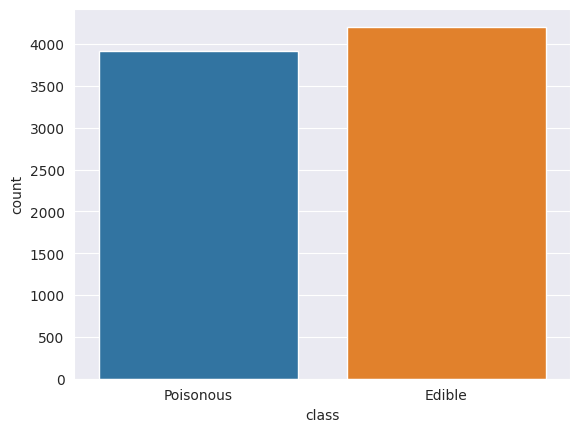

In [44]:
sns.countplot(data=definitions_df, x="class")
print(definitions_df['class'].value_counts())

<AxesSubplot: xlabel='class', ylabel='Count'>

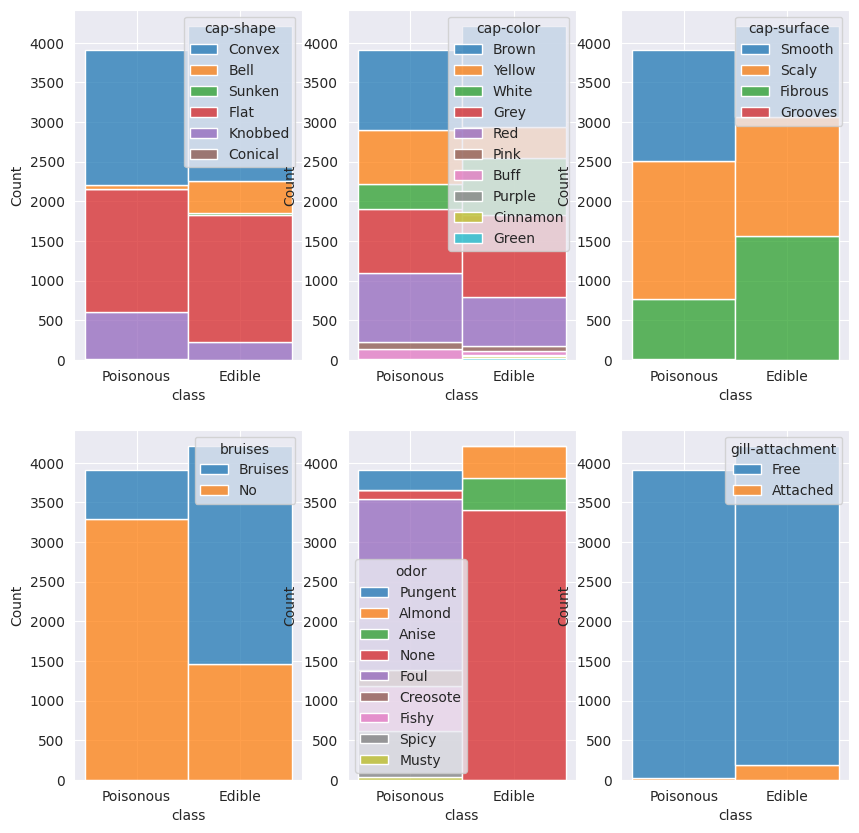

In [45]:
plt.figure(figsize=(10, 10))

plt.subplot(2,3,1)
sns.histplot(data=definitions_df, x='class', hue='cap-shape', multiple='stack', )

plt.subplot(2,3,2)
sns.histplot(data=definitions_df, x='class', hue='cap-color', multiple='stack')

plt.subplot(2,3,3)
sns.histplot(data=definitions_df, x='class', hue='cap-surface', multiple='stack')

plt.subplot(2,3,4)
sns.histplot(data=definitions_df, x='class', hue='bruises', multiple='stack')

plt.subplot(2,3,5)
sns.histplot(data=definitions_df, x='class', hue='odor', multiple='stack')

plt.subplot(2,3,6)
sns.histplot(data=definitions_df, x='class', hue='gill-attachment', multiple='stack')

<AxesSubplot: xlabel='class', ylabel='Count'>

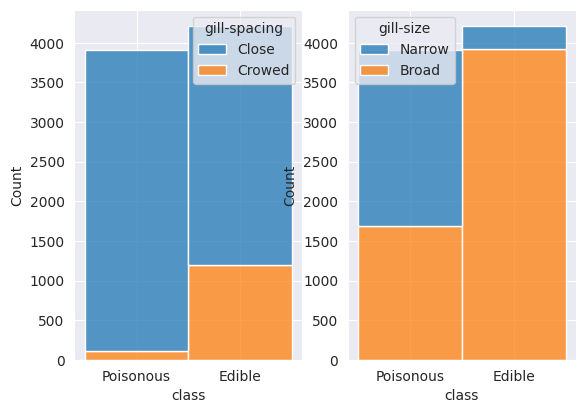

In [46]:
plt.figure(figsize=(10, 10))

plt.subplot(2,3,1)
sns.histplot(data=definitions_df, x='class', hue='gill-spacing', multiple='stack')

plt.subplot(2,3,2)
sns.histplot(data=definitions_df, x='class', hue='gill-size', multiple='stack')